In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red_wine['Type'] = 'Red'
white_wine['Type'] = 'White'

In [6]:
wine_quality = pd.concat([red_wine, white_wine], ignore_index=True)
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [7]:
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,White


In [8]:
# for further use, encode Red type as 1 and White type as 0
wine_quality['Type'] = wine_quality['Type'].map({'Red': 1, 'White': 0})

In [9]:
def quality_assign(quality):
    if quality in [3, 4]:
        return 1
    elif quality in [5, 6, 7]:
        return 2
    elif quality in [8, 9]:
        return 3

wine_quality['quality_level'] = wine_quality['quality'].apply(quality_assign)

wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,2


### Decision Tree for Wine Type

In [10]:
# Test-Train Split
from sklearn.model_selection import train_test_split
y = wine_quality['Type']
X = wine_quality.drop('Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

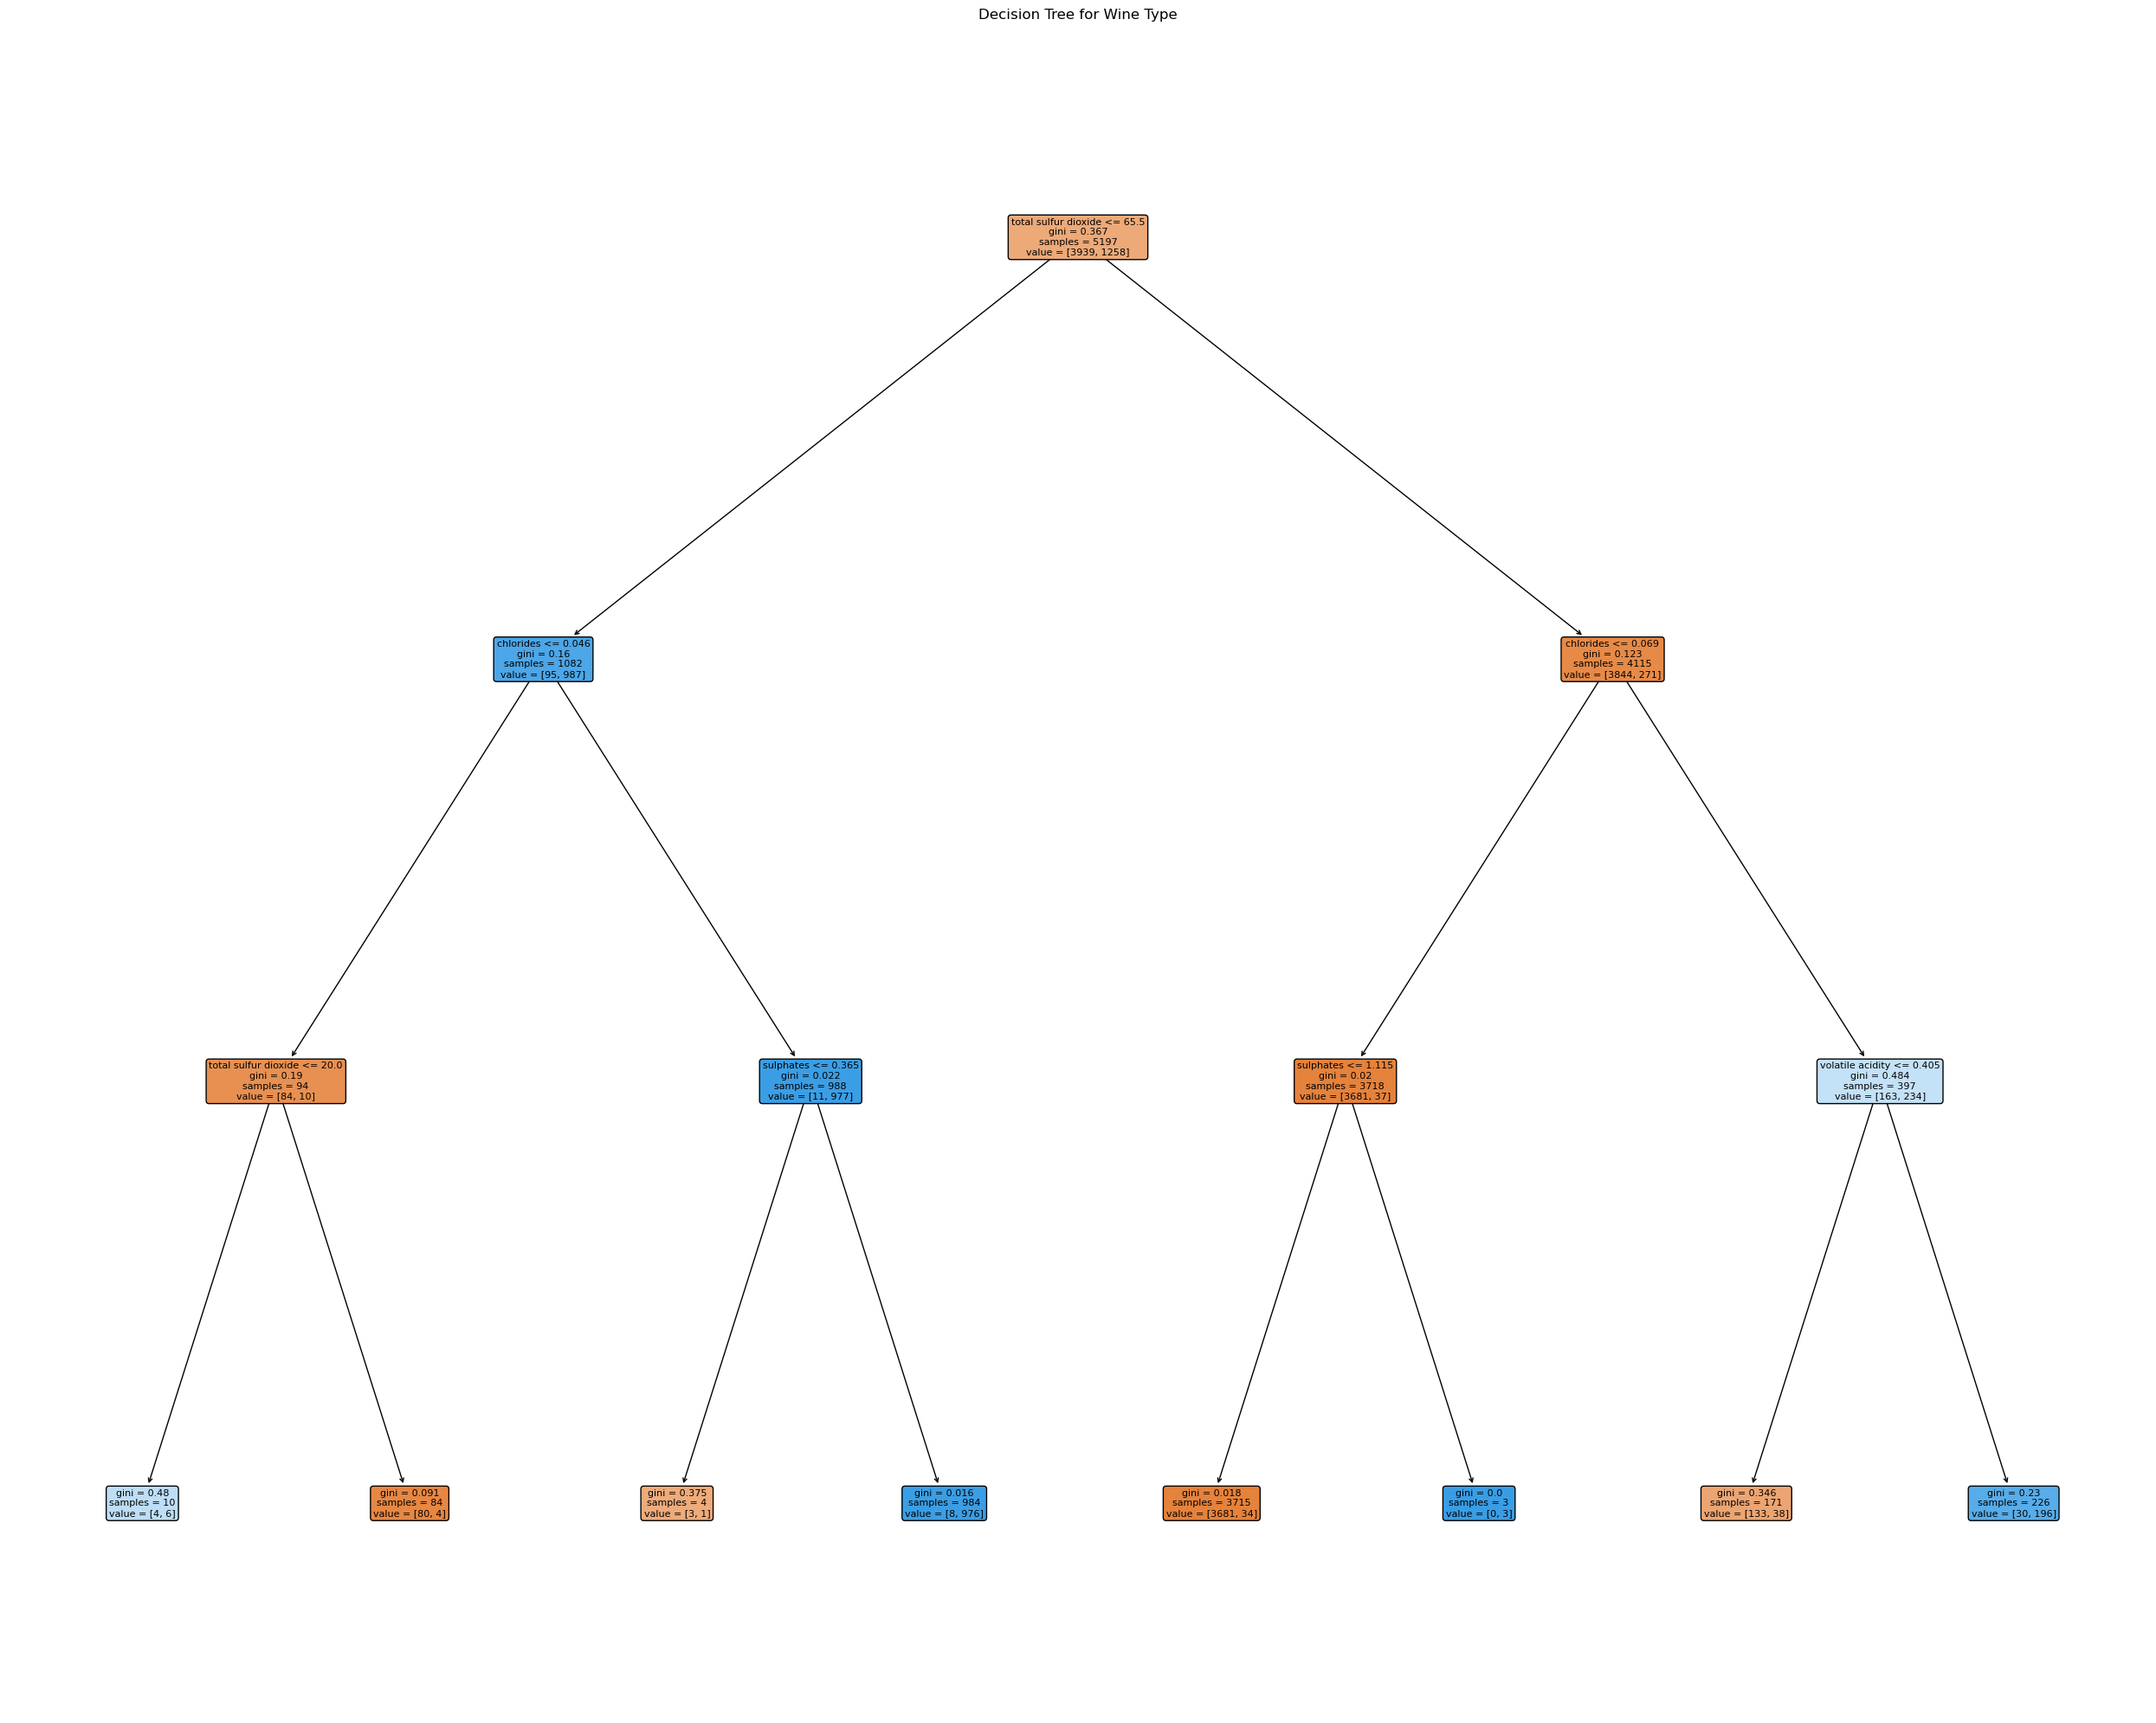

In [12]:
plt.figure(figsize=(25, 20))
plot_tree(classifier, filled=True, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.title("Decision Tree for Wine Type")

plt.tight_layout()
plt.show()

Root Node: Total sulfur dioxide <= 65.5

White wines are associated with 20 < total sulfur dioxide <= 65.5, chlorides > 0.046, sulfates > 0.365. 

Meanwhile, red wines tend to have total sulfur dioxide > 65.5, chlorides <= 0.069, sulfates <= 1.115.

That is, white wines are less sour than red wines, and they have higher sulfates and chlorides contents.

In [13]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(int)
accuracy_q = accuracy_score(y_test, y_pred_rounded)
print(f"Accuracy: {accuracy_q:.2f}")

Accuracy: 0.96


The model has an accuracy of 0.96, which is high. It means that 96% of the predicted cases are correct. 

In [14]:
# See if the tree needs to be pruned
train_preds = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

test_preds = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    if difference > 0.08 : 
        print('Model is overfitted, pruning is needed.')
    else:
        print('No pruning is needed.')

No pruning is needed.


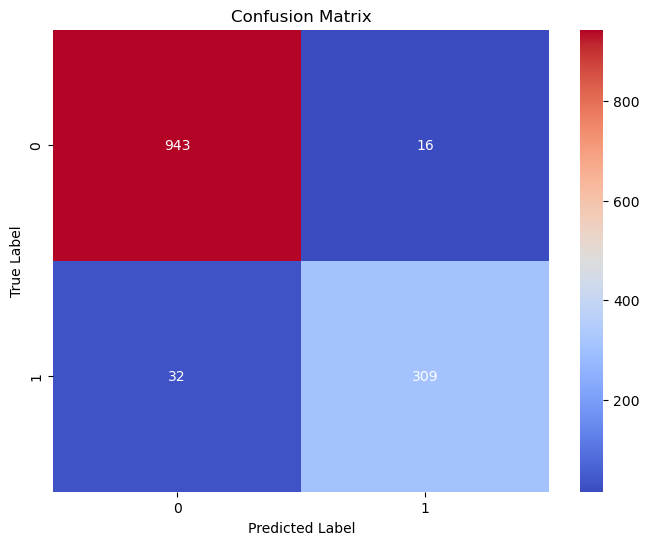

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt="d", cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add annotation
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j+0.5, i+0.5, cm[i, j], 
                horizontalalignment='center', 
                verticalalignment='center', 
                color="white")

plt.show()

In [16]:
recall_white = np.round(309/(309+32), 4)
precision_white = np.round(309/(309+16), 4)

recall_red = np.round(943/(943+16), 4)
precision_red = np.round(943/(943+32), 4)

print("Recall for White Wine:", recall_white)
print("Precision for White Wine:", precision_white)

print("Recall for Red Wine:", recall_red)
print("Precision for Red Wine:", precision_red)

Recall for White Wine: 0.9062
Precision for White Wine: 0.9508
Recall for Red Wine: 0.9833
Precision for Red Wine: 0.9672


According to the confusion matrix, the decision tree model has a precision rate of 0.9508, meaning that from the cases predicted as positive (wine type is White), 95.08% of them are actually White wine. Meanwhile, the model has a recall rate of 0.9062, meaning that among all White wine cases, 90.62% of them are predicted correctly. For Red wine, the recall rate is 0.9833 and the precision rate is 0.9672

### Decision Tree for Quality

In [17]:
# Test-Train Split
from sklearn.model_selection import train_test_split
y_q = wine_quality['quality_level']
X_q = wine_quality.drop(['quality_level', 'quality'], axis=1)

X_q_train, X_q_test, y_q_train, y_q_test = train_test_split(X_q, y_q, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_q_train, y_q_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

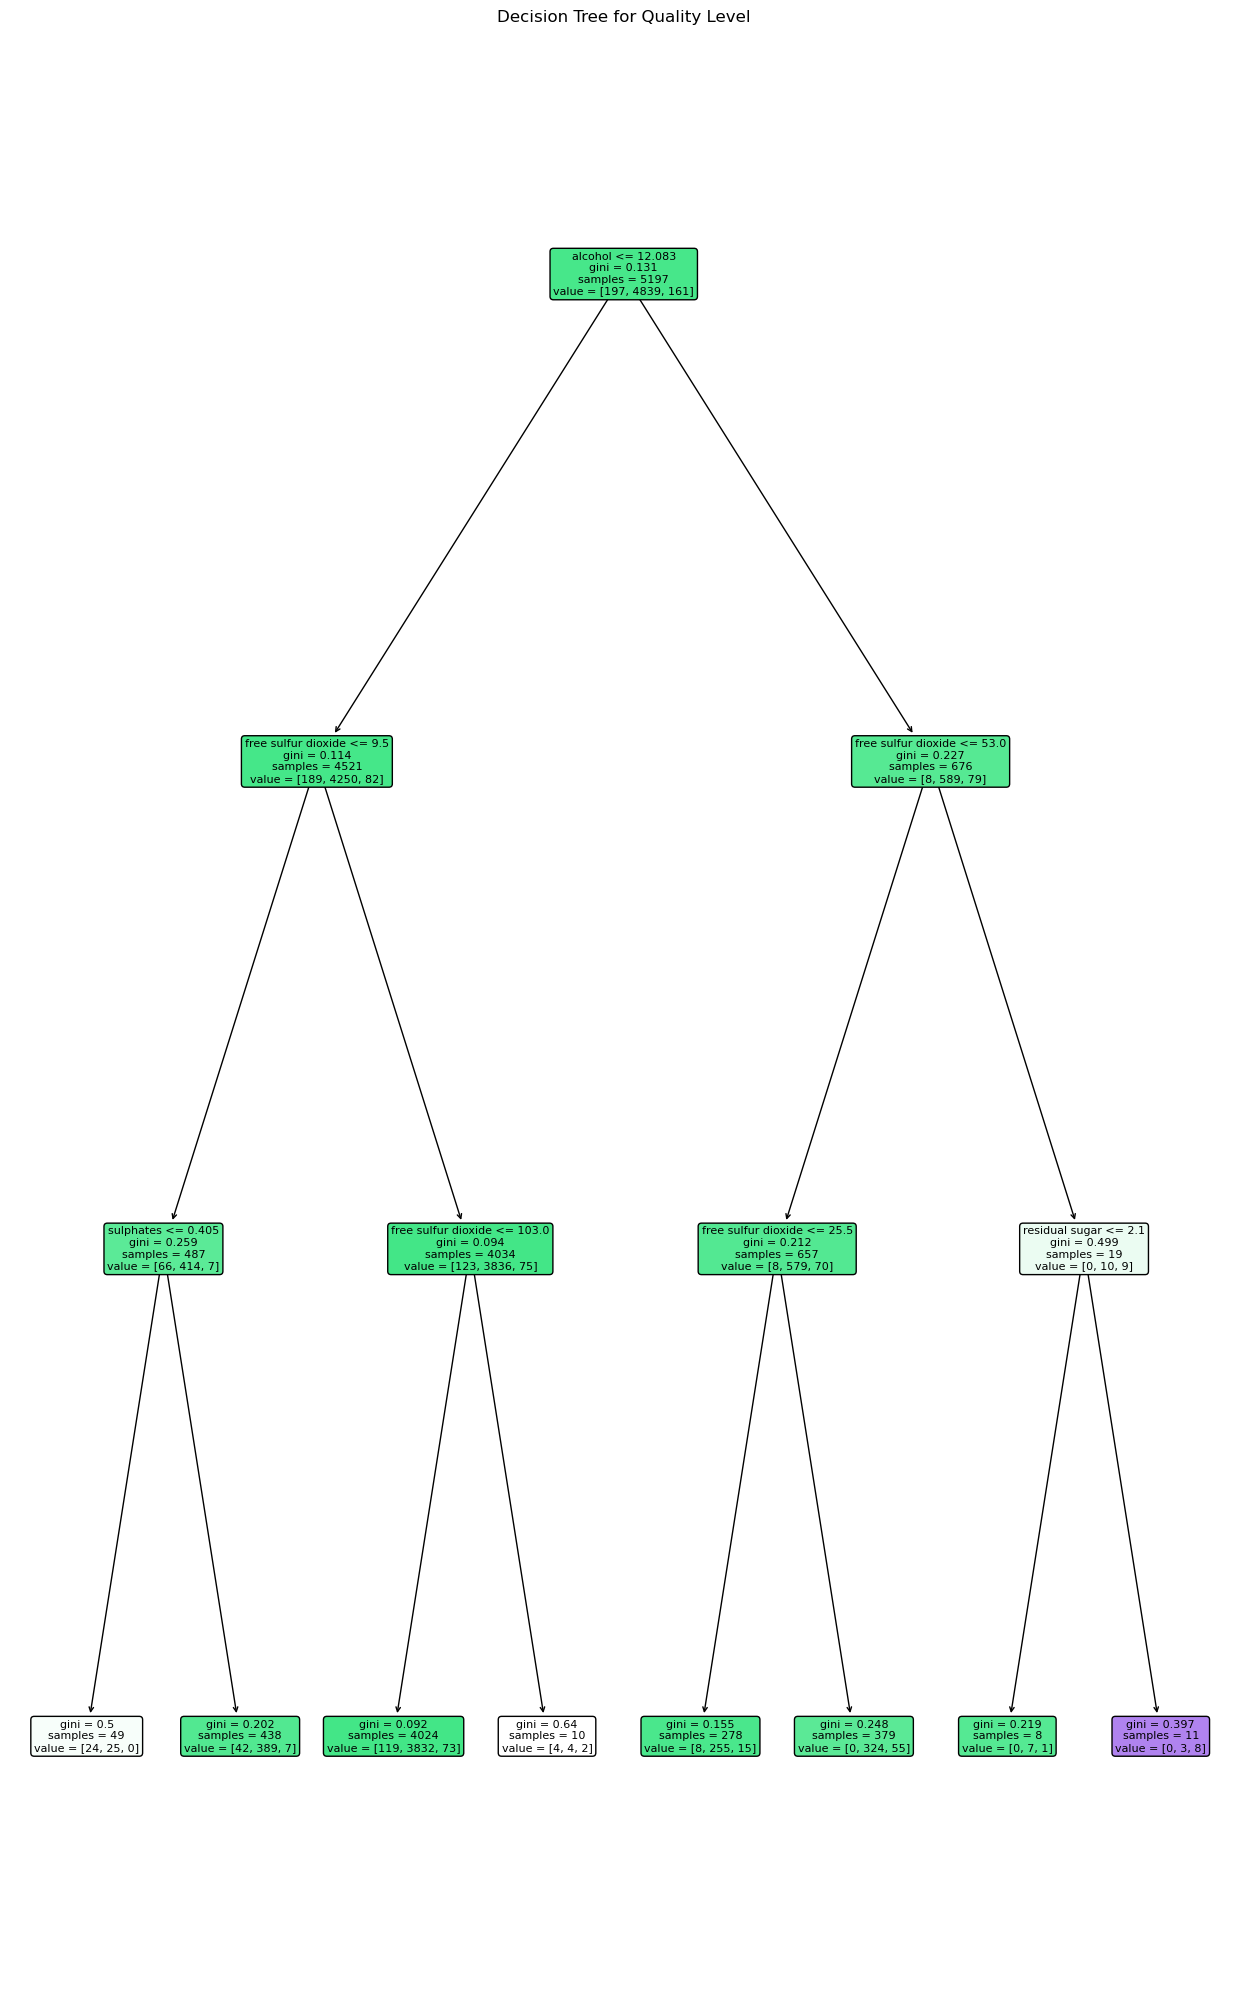

In [19]:
plt.figure(figsize=(25, 20))
plt.subplot(1, 2, 1)
plot_tree(classifier, filled=True, feature_names=X_q_train.columns, rounded=True,fontsize=8)
plt.title("Decision Tree for Quality Level")

plt.tight_layout()
plt.show()

Root Node: alchohol <= 12.083

For Level 1 quality, it associates with features including alchohol content <= 12.083 (low alchohol content), free sulfur dioxide <= 9.5 and sulphates <= 0.405 (low free sulfur dioxide content and low sulphates content)

For Level 2 quality, it tends to have features like alchohol content <= 12.083 (low alchohol content), 0.95 < free sulfur dioxide < 103.

For Level 3 quality, the features are alchohol content > 12.083 (high alchohol content), free sulfur dioxide > 53(high free sulfur dioxide content), and residual sugar > 2.1.

In [20]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_q_pred = classifier.predict(X_q_test)
accuracy_q = accuracy_score(y_q_test, y_q_pred)
class_report = classification_report(y_q_test, y_q_pred)

print(f"Accuracy: {accuracy_q:.2f}")
print(class_report)

Accuracy: 0.93
              precision    recall  f1-score   support

           1       0.40      0.04      0.07        49
           2       0.94      0.99      0.96      1214
           3       0.20      0.03      0.05        37

    accuracy                           0.93      1300
   macro avg       0.51      0.35      0.36      1300
weighted avg       0.89      0.93      0.90      1300



In [21]:
# See if the tree needs to be pruned
train_preds = classifier.predict(X_q_train)
train_accuracy = accuracy_score(y_q_train, train_preds)

test_preds = classifier.predict(X_q_test)
test_accuracy = accuracy_score(y_q_test, test_preds)

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    if difference > 0.08 : 
        print('Model is overfitted, pruning is needed.')
    else:
        print('No pruning is needed.')

No pruning is needed.


### Random Forest for Wine Type

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42) 
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [23]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(class_report)

Accuracy: 0.963076923076923
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       959
           1       0.95      0.91      0.93       341

    accuracy                           0.96      1300
   macro avg       0.96      0.94      0.95      1300
weighted avg       0.96      0.96      0.96      1300



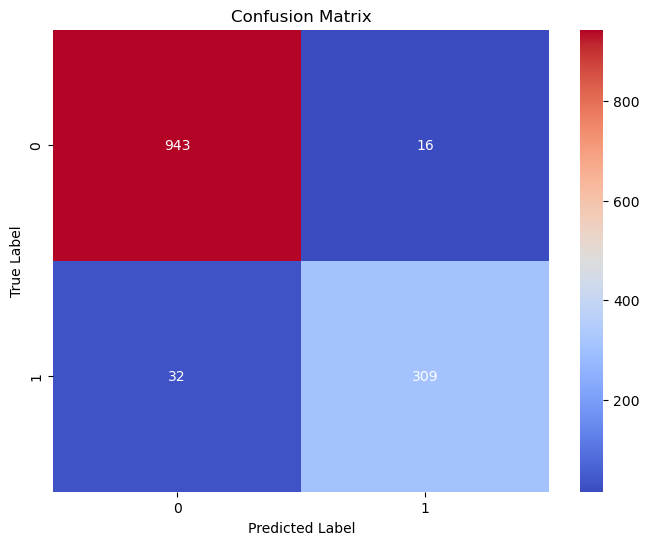

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt="d", cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add annotation
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j+0.5, i+0.5, cm[i, j], 
                horizontalalignment='center', 
                verticalalignment='center', 
                color="white")

plt.show()

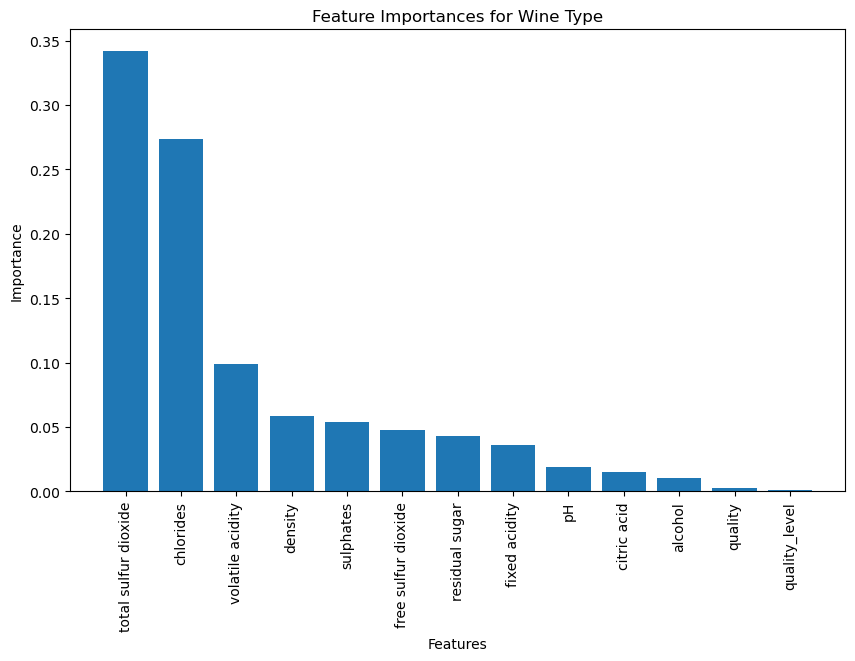

In [25]:
# Feature importance
importances = rf_classifier.feature_importances_
feature_names = np.array(list(X_train.columns))

# Sort importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Wine Type")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

The graph above shows that the most important feature for classifying Red and White wines is the total sulfur dioxide, then chlorides, and volatile acidity.

### Random Forest for Quality Levels

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42) 
rf_classifier.fit(X_q_train, y_q_train)
rf_predictions = rf_classifier.predict(X_q_test)

In [27]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_q_test, rf_predictions)
class_report = classification_report(y_q_test, rf_predictions)

print(f"Accuracy: {accuracy:.2f}")
print(class_report)

Accuracy: 0.95
              precision    recall  f1-score   support

           1       0.89      0.16      0.28        49
           2       0.95      1.00      0.97      1214
           3       0.92      0.30      0.45        37

    accuracy                           0.95      1300
   macro avg       0.92      0.49      0.57      1300
weighted avg       0.94      0.95      0.93      1300



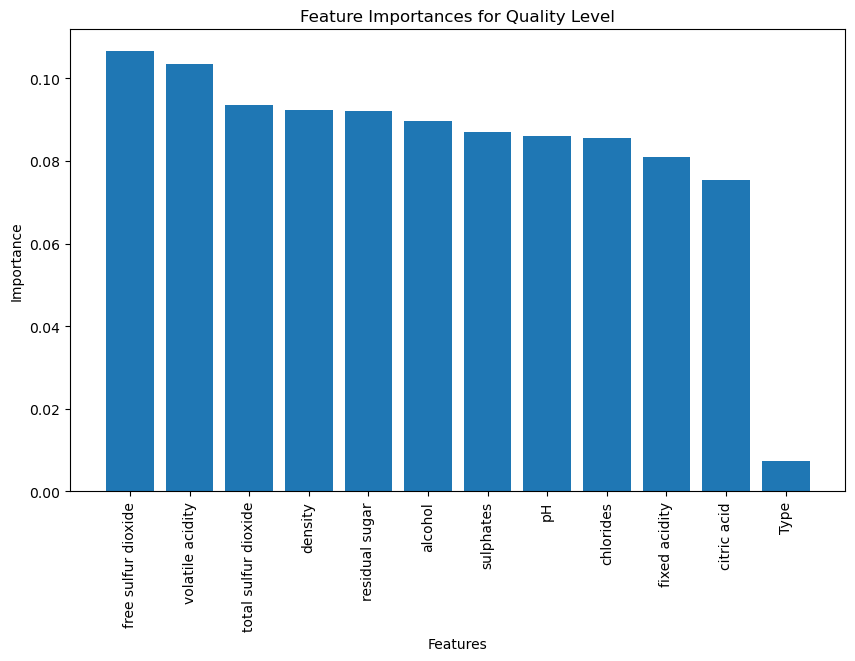

In [28]:
# Feature importance
importances = rf_classifier.feature_importances_
feature_names = np.array(list(X_q_train.columns))

# Sort importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Quality Level")
plt.bar(range(X_q_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_q_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_q_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Among all features, free sulfur dioxide is the most important feature to classify wine's quality levels, but it is not high (just over 0.1). Volatile acidity is the second important feature.

### What chemical ingredients contribute to alcohol?

In [29]:
# Select chemicals
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type', 'quality_level'],
      dtype='object')

In [30]:
columns_selected = ['alcohol', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

In [31]:
chemicals = wine_quality[columns_selected]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = chemicals.drop('alcohol', axis=1)
y = chemicals['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

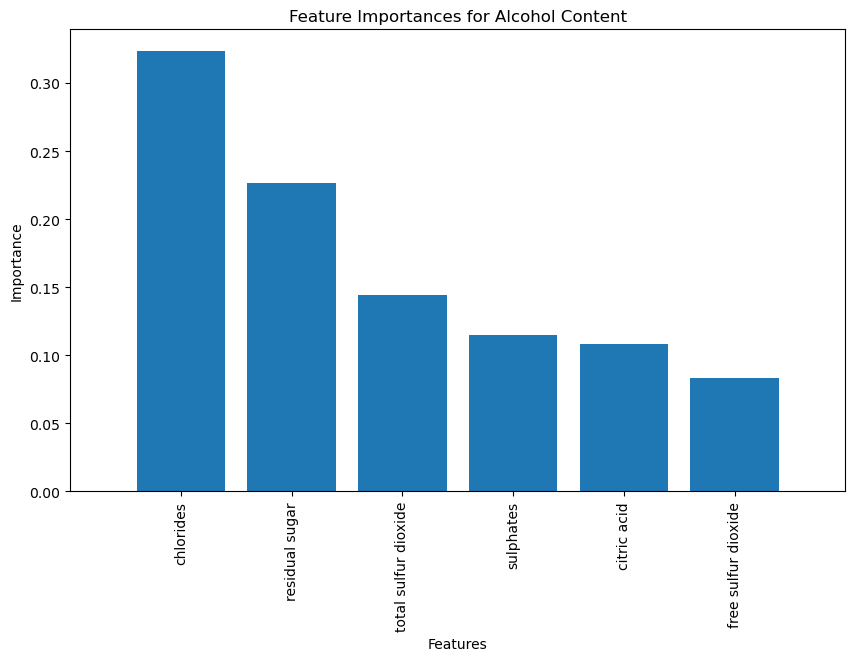

In [33]:
# Feature importance
importances = rf_regressor.feature_importances_
feature_names = np.array(list(X_train.columns))

# Sort importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Alcohol Content")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Chlorides, residual sugar, and total sulfur dioxide are the top 3 chemicals that contribute to alcohol content.

Since we know from previous decision tree model that Level 3 (the top) Quality tend to have high alcohol content (alcohol>12.083), chateau could improve wine quality by increasing the content of Chlorides, residual sugar, and total sulfur dioxide.

### Lasso
Use Lasso to see the influence of chemicals on wine type

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

y = wine_quality['Type']
X = wine_quality.drop(['Type', 'quality', 'quality_level'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Get the coefficients
coefficients = log_reg.coef_.flatten()

# Get important features
feature_importance = pd.Series(coefficients, index=X.columns).abs().sort_values(ascending=False)

print(feature_importance)

residual sugar          4.100916
density                 4.021347
total sulfur dioxide    3.146682
alcohol                 1.416391
volatile acidity        1.372470
free sulfur dioxide     1.187860
chlorides               0.837684
sulphates               0.699636
citric acid             0.307657
fixed acidity           0.180114
pH                      0.096680
dtype: float64


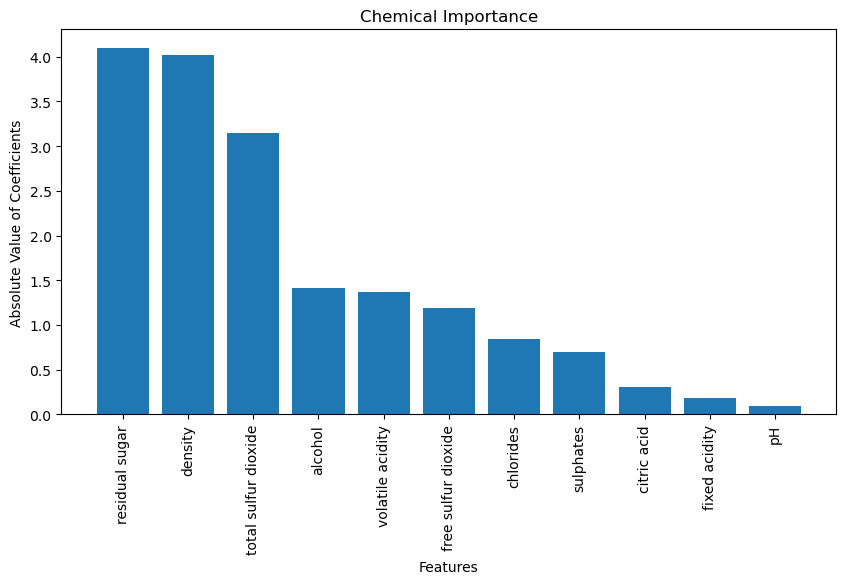

In [44]:
plt.figure(figsize=(10, 5))
plt.bar(feature_importance.index, feature_importance.values)
plt.title('Chemical Importance')
plt.ylabel('Absolute Value of Coefficients')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()